In [1]:
import numpy as np
import pandas as pd

https://www.sciencedirect.com/science/article/pii/S2324242624000639#tbl2
Reasearch paper
acc is 95.16 
ours reached to 95.21

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#%matplotlib inline
#plt.rcParams['figure.figsize'] = (16,11)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings 
warnings.filterwarnings('ignore')


In [3]:
import os
import pandas as pd

# Load dataset
dataset = pd.read_csv("../Datasets/healthcare-dataset-stroke-data.csv")
print(dataset.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


## pre processing

In [4]:
data=dataset.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#filling mean
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [8]:
data.drop(columns=['id'],axis=1,inplace=True) 
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [9]:
categorical_var=['gender','ever_married','work_type','Residence_type','smoking_status']
numerical_var=['age','hypertension','heart_disease','avg_glucose_level','bmi']

In [10]:
print("number of unique variables")
print('work_type:',data['work_type'].unique())
print('gender:',data['gender'].unique())
print('Residence_type:',data['Residence_type'].unique())
print('ever_married:',data['ever_married'].unique())
print('smoking_status:',data['smoking_status'].unique())
data['smoking_status'].replace('formerly smoked','former smoker',inplace=True)

number of unique variables
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
gender: ['Male' 'Female' 'Other']
Residence_type: ['Urban' 'Rural']
ever_married: ['Yes' 'No']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [11]:
le=LabelEncoder() #creating an isntance of LabelEncoder class
smoking_status = le.fit_transform(data['smoking_status'])
gender = le.fit_transform(data['gender'])
ever_married = le.fit_transform(data['ever_married'])
Residence_type = le.fit_transform(data['Residence_type'])
work_type = le.fit_transform(data['work_type'])

In [12]:
#Replacing the above arrays in the data
data['work_type'] = work_type
data['gender'] = gender
data['Residence_type'] = Residence_type
data['ever_married'] = ever_married
data['smoking_status'] = smoking_status

In [13]:
bins=[0, 9, 19, 24, 59, float('inf')]
labels=['0-9', '10-19', '20-24', '25-59', '60 and above']
# Bin the ages into categories
data['age'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)
# Label encode the age groups
le = LabelEncoder()
data['age']=le.fit_transform(data['age'])
# Display the mappings
print("Label Encoding Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
# Display the DataFrame
print(data)


Label Encoding Mapping: {'0-9': np.int64(0), '10-19': np.int64(1), '20-24': np.int64(2), '25-59': np.int64(3), '60 and above': np.int64(4)}
      gender  age  hypertension  heart_disease  ever_married  work_type  \
0          1    4             0              1             1          2   
1          0    4             0              0             1          3   
2          1    4             0              1             1          2   
3          0    3             0              0             1          2   
4          0    4             1              0             1          3   
...      ...  ...           ...            ...           ...        ...   
5105       0    4             1              0             1          2   
5106       0    4             0              0             1          3   
5107       0    3             0              0             1          3   
5108       1    3             0              0             1          2   
5109       0    3             0    

In [14]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,2,1,228.69,36.600000,1,1
1,0,4,0,0,1,3,0,202.21,28.893237,2,1
2,1,4,0,1,1,2,0,105.92,32.500000,2,1
3,0,3,0,0,1,2,1,171.23,34.400000,3,1
4,0,4,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,4,1,0,1,2,1,83.75,28.893237,2,0
5106,0,4,0,0,1,3,1,125.20,40.000000,2,0
5107,0,3,0,0,1,3,0,82.99,30.600000,2,0
5108,1,3,0,0,1,2,0,166.29,25.600000,1,0


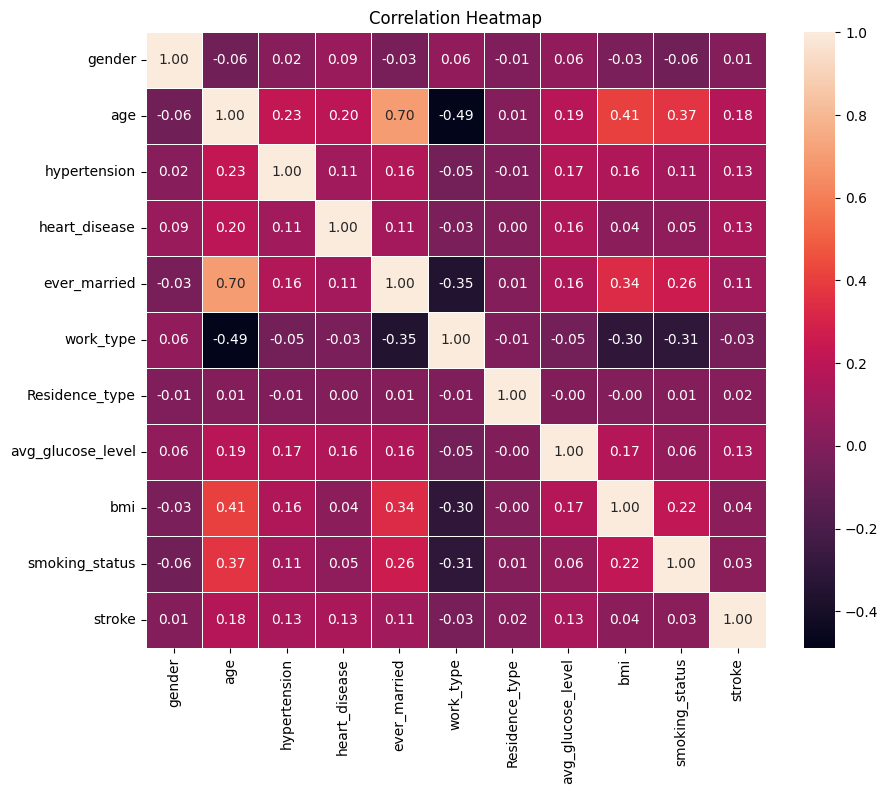

In [15]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
print(data['Residence_type'].value_counts())

Residence_type
1    2596
0    2514
Name: count, dtype: int64


Text(0.5, 1.0, 'Age vs Stroke')

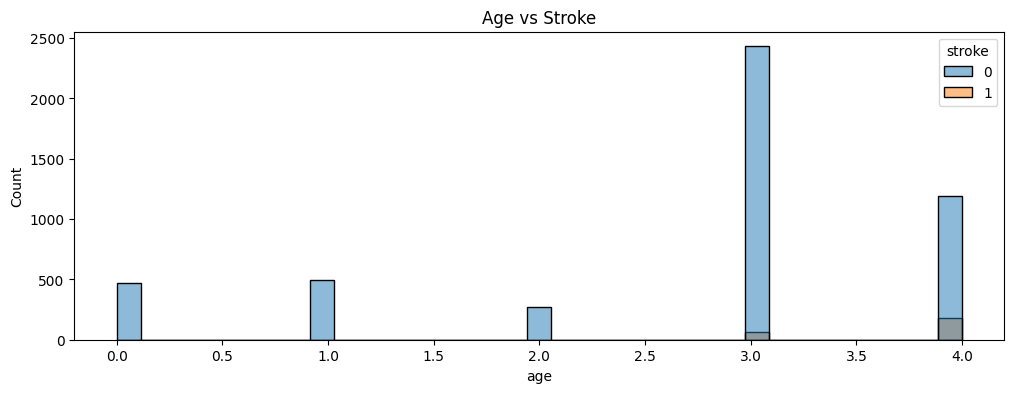

In [17]:
plt.figure(figsize=(12, 4))
pl = sns.histplot(x='age', data=data, hue='stroke', bins=35)
pl.set_title('Age vs Stroke')

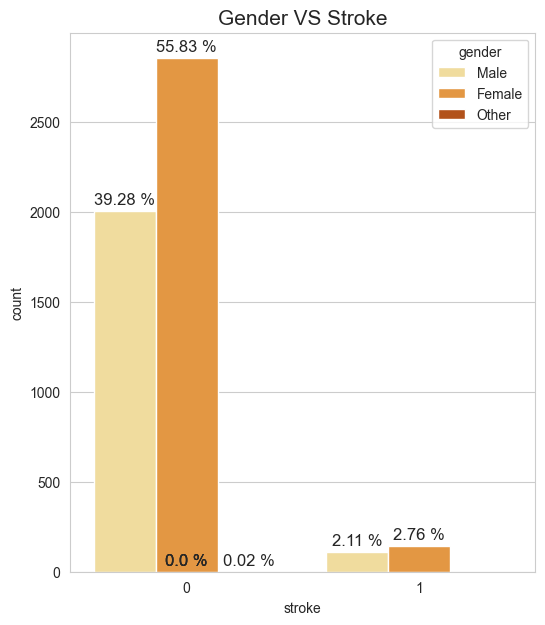

In [18]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize = (6,7))
ax=sns.countplot(x=data['stroke'],hue=dataset['gender'],palette = 'YlOrBr')
ax.set_title("Gender VS Stroke",fontsize = 15)

for j in ax.patches:
        ax.annotate(f'{round(j.get_height()/len(dataset)*100,2)} %', xy=(j.get_x() + j.get_width() / 2,  
            j.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

In [19]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:
data1 = data.copy()
X = data.drop('stroke', axis = 1)
Y = data['stroke']
Y = pd.DataFrame(Y)
X=pd.DataFrame(X)

In [21]:
X.columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'avg_glucose_level','bmi','smoking_status']
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,4,0,1,1,2,1,228.69,36.600000,1
1,0,4,0,0,1,3,0,202.21,28.893237,2
2,1,4,0,1,1,2,0,105.92,32.500000,2
3,0,3,0,0,1,2,1,171.23,34.400000,3
4,0,4,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,4,1,0,1,2,1,83.75,28.893237,2
5106,0,4,0,0,1,3,1,125.20,40.000000,2
5107,0,3,0,0,1,3,0,82.99,30.600000,2
5108,1,3,0,0,1,2,0,166.29,25.600000,1


## split dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2 ,random_state =28)

In [23]:
Y_train.value_counts()

stroke
0         3888
1          200
Name: count, dtype: int64

In [24]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
963,0,3,0,0,0,2,0,73.69,17.3,2
2162,0,3,0,0,1,0,1,122.32,23.9,0
3003,0,3,0,0,0,2,0,74.53,24.6,2
3978,1,2,0,0,0,2,1,59.67,27.7,2
4029,1,3,0,0,1,0,1,101.96,34.5,2
...,...,...,...,...,...,...,...,...,...,...
4236,0,3,0,0,1,2,1,131.42,24.9,3
87,0,4,0,1,1,2,0,59.35,32.3,1
1541,0,3,0,0,1,2,1,157.01,26.1,3
4089,1,3,0,0,1,0,1,57.59,32.8,0


In [25]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4180,1,3,0,0,1,2,1,78.43,43.7,3
3601,0,3,0,0,0,2,1,82.05,21.0,0
5083,0,1,0,0,0,2,1,90.57,24.2,0
632,1,3,0,0,1,0,0,111.73,34.6,2
1419,1,3,0,0,1,2,1,81.94,27.7,3
...,...,...,...,...,...,...,...,...,...,...
355,0,4,1,0,1,2,0,205.23,39.5,2
4796,1,4,1,0,0,0,1,71.29,37.7,2
206,0,4,0,0,1,2,0,80.13,23.4,2
405,0,4,0,1,1,0,1,70.21,24.8,2


In [26]:
Y_test

,stroke
4180,0
3601,0
5083,0
632,0
1419,0
...,...
355,0
4796,0
206,1
405,0


In [27]:
Y_train

,stroke
963,0
2162,0
3003,0
3978,0
4029,0
...,...
4236,0
87,1
1541,0
4089,0


# training

In [60]:
# Count the occurrences of 0's and 1's in y_train
train_zeros = np.sum(Y_train == 0)
train_ones = np.sum(Y_train == 1)

# Count the occurrences of 0's and 1's in y_test
test_zeros = np.sum(Y_test == 0)
test_ones = np.sum(Y_test == 1)

# Print the counts
print(f"y_train: 0's = {int(train_zeros)}, 1's = {int(train_ones)}")
print(f"y_test: 0's = {int(test_zeros)}, 1's = {int(test_ones)}")

y_train: 0's = 3888, 1's = 200
y_test: 0's = 973, 1's = 49


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Assuming Y_train and Y_test are your training and testing labels

# Initialize classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Voting Classifier with different models
voting_clf = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier()),
    ('lr', LogisticRegression()),
    ('svc', SVC())
], voting='hard')

models['Voting Classifier'] = voting_clf

# Prepare for the loop
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict using the trained model
    Y_pred = model.predict(X_test)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    
    # Print summary for each model
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("-" * 40)

# Optionally, if ANN is required later, you can train an artificial neural network (ANN) using libraries like Keras or TensorFlow.


Model: Decision Tree
Accuracy: 0.8982
Confusion Matrix:
[[910  63]
 [ 41   8]]
----------------------------------------
Model: Logistic Regression
Accuracy: 0.9521
Confusion Matrix:
[[973   0]
 [ 49   0]]
----------------------------------------
Model: SVM
Accuracy: 0.9521
Confusion Matrix:
[[973   0]
 [ 49   0]]
----------------------------------------
Model: AdaBoost
Accuracy: 0.9521
Confusion Matrix:
[[973   0]
 [ 49   0]]
----------------------------------------
Model: Gradient Boosting
Accuracy: 0.9481
Confusion Matrix:
[[967   6]
 [ 47   2]]
----------------------------------------
Model: Voting Classifier
Accuracy: 0.9521
Confusion Matrix:
[[973   0]
 [ 49   0]]
----------------------------------------


In [62]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [63]:
# Parameter grids for hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 10]
}

# Voting Classifier does not require individual tuning, but you can tune the individual models first


In [66]:
# Suppress specific warnings
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


# Create model instances
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize the dictionary to store best models and results
best_models = {}
results = {}

# Fine-tune models with GridSearchCV
for name, model in models.items():
    if name == 'Decision Tree':
        grid_search = GridSearchCV(model, param_grid_dt, cv=5, n_jobs=-1)
    elif name == 'Logistic Regression':
        grid_search = GridSearchCV(model, param_grid_lr, cv=5, n_jobs=-1)
    elif name == 'SVM':
        grid_search = GridSearchCV(model, param_grid_svc, cv=5, n_jobs=-1)
    elif name == 'AdaBoost':
        grid_search = GridSearchCV(model, param_grid_ab, cv=5, n_jobs=-1)
    elif name == 'Gradient Boosting':
        grid_search = GridSearchCV(model, param_grid_gb, cv=5, n_jobs=-1)

    # Fit GridSearchCV
    grid_search.fit(X_train, Y_train)
    
    # Store the best model and results
    best_models[name] = grid_search.best_estimator_
    results[name] = grid_search.best_params_

    # Predict with the best model
    Y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    
    # Print the results
    print(f"Model: {name}")
    print(f"Best Params: {results[name]}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("-" * 40)


Model: Decision Tree
Best Params: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.9521
Confusion Matrix:
[[973   0]
 [ 49   0]]
----------------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

Model: Logistic Regression
Best Params: {'C': 0.1, 'solver': 'saga'}
Accuracy: 0.9521
Confusion Matrix:
[[973   0]
 [ 49   0]]
----------------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

Model: SVM
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9521
Confusion Matrix:
[[973   0]
 [ 49   0]]
----------------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

Model: AdaBoost
Best Params: {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy: 0.9521
Confusion Matrix:
[[973   0]
 [ 49   0]]
----------------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sk

Model: Gradient Boosting
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.9501
Confusion Matrix:
[[971   2]
 [ 49   0]]
----------------------------------------
